# Estudo da performance do treinamento utilizando Regressão Linear e TensorFlow

Um modelo de regressão linear pode ser definido como y = mx + c, onde m é a inclinação da reta e c é o intercepto. 

Em aprendizado profundo, os parâmetros do modelo, m e c, podem ser chamados de peso e viés.

In [1]:
# Carregar pacotes
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

 O modelo abaixo possui atributos W e b que representam a inclinação e a interceptação, respectivamente. No código, o valor inicial foi definido, entretanto eles são inicializados aleatoriamente. 
 
 No TensorFlow, tudo o que um modelo aprende é definido usando tf.Variable. Isso significa que, ao longo da execução, os valores dessas variáveis serão alterados, ou seja, são mutáveis.

Em seguida, definimos a operação do nosso modelo na função __call__, que aceita uma entrada x. Semelhante à nossa equação acima, multiplicamos a entrada pelo peso W e adicionamos o viés b. 

In [2]:
# Modelo

class reg_model:
    def __init__(self):
        self.W = tf.Variable(16.0)
        self.b = tf.Variable(10.0)
    
    def __call__(self,x):
        return self.W * x + self.b

# __call__ é uma função especial no Python que nos permite tratar um objeto como uma função

In [3]:
# Instanciar o modelo 
modelo = reg_model()
modelo(20)

<tf.Tensor: shape=(), dtype=float32, numpy=330.0>

In [4]:
# Gerar dados
# Gerar os dados de modo que a inclinação da linha seja 3.0 e a interceptação seja 0.5

# Definindo valores "reais" para os pesos
TRUE_W = 3.0 # slope
TRUE_b = 0.5 # intercepto

# Número de exemplos
NUM_EXEMPLOS = 1000

# Gera valores para x
X = tf.random.normal(shape = (NUM_EXEMPLOS,))

# Gera ruído
noise = tf.random.normal(shape = (NUM_EXEMPLOS,))

# Gera o valor "verdadeiro" de y
y = X * TRUE_W + TRUE_b + noise

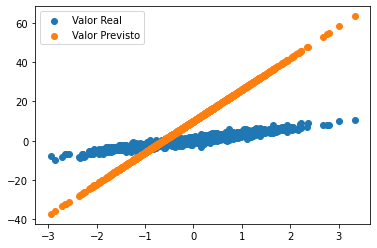

In [5]:
# Gerar plot para análise 
# Plot do valor "real"
plt.scatter(X, y, label = "Valor Real")

# Plot do valor "previsto" pelo nosso modelo
plt.scatter(X, modelo(X), label = "Valor Previsto")

plt.legend()
plt.show()

# Aplicar Função de Custo

In [6]:
# Função de custo - calcular erro
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

In [7]:
# Função para executar o treinamento
def train(modelo, X, y, lr = 0.01):
    with tf.GradientTape() as t:
        current_loss = loss(y, modelo(X))

    derivada_W, derivada_b = t.gradient(current_loss, [modelo.W, modelo.b])
    modelo.W.assign_sub(lr * derivada_W)
    modelo.b.assign_sub(lr * derivada_b)

In [12]:
# Definir modelo e parâmetros
modelo = reg_model()

# listas vazias para w e b
Ws , bs = [] , []

# n de épocas - vezes que o modelo passa pelos dados
epochs = 20

In [13]:
# Treinamento

for epoch in range(epochs):
    Ws.append(modelo.W.numpy()) 
    bs.append(modelo.b.numpy())

    current_loss = loss(y, modelo(X))

    train(modelo, X, y, lr = 0.1)
    
    print(f"Epoch {epoch}: Loss (Erro): {current_loss.numpy()}")

Epoch 0: Loss (Erro): 243.55459594726562
Epoch 1: Loss (Erro): 161.4530792236328
Epoch 2: Loss (Erro): 107.14286041259766
Epoch 3: Loss (Erro): 71.21527862548828
Epoch 4: Loss (Erro): 47.44748306274414
Epoch 5: Loss (Erro): 31.723434448242188
Epoch 6: Loss (Erro): 21.320573806762695
Epoch 7: Loss (Erro): 14.437950134277344
Epoch 8: Loss (Erro): 9.88422966003418
Epoch 9: Loss (Erro): 6.871288299560547
Epoch 10: Loss (Erro): 4.877747058868408
Epoch 11: Loss (Erro): 3.5586743354797363
Epoch 12: Loss (Erro): 2.6858596801757812
Epoch 13: Loss (Erro): 2.1083152294158936
Epoch 14: Loss (Erro): 1.7261466979980469
Epoch 15: Loss (Erro): 1.4732557535171509
Epoch 16: Loss (Erro): 1.3059086799621582
Epoch 17: Loss (Erro): 1.1951669454574585
Epoch 18: Loss (Erro): 1.1218827962875366
Epoch 19: Loss (Erro): 1.0733858346939087


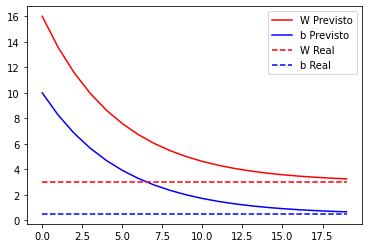

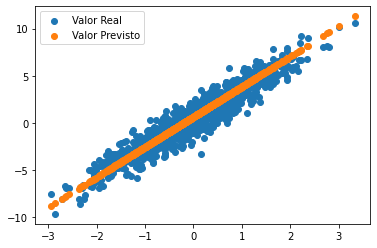

In [14]:
# Plot
plt.plot(range(epochs), Ws, 'r', range(epochs), bs, 'b')
plt.plot([TRUE_W] * epochs, 'r--', [TRUE_b] * epochs, 'b--')
plt.legend(['W Previsto', 'b Previsto', 'W Real', 'b Real'])
plt.show()

# Plot do valor "real"
plt.scatter(X, y, label = "Valor Real")

# Plot do valor "previsto" pelo nosso modelo
plt.scatter(X, modelo(X), label = "Valor Previsto")

plt.legend()
plt.show()